#  MANEJANDO MONGO CON PYMONGO

__Materia__: Big Data EJ22


***
__Nombres de los integrantes del equipo__: 

 * Isaias Gerardo Cordova Palomares | 19130514

 * Fatima Gorety Garcia Yescas   | 19130527

 * Ivan Herrera Garcia | 19130535
***

# Descripcion 

El trabajo consiste en utiliza MongoDB con Python.
1)     Instalar MongoDB

2)     Instalar PyMongo en Anaconda así como sus dependencias


***
3)     Desde Jupyter notebook :
 * Importar a mongo el archivo csv de titanic.csv (puede ser también en el cmd)
 * Realizar consultas sencillas.
 * Utilizar los métodos: find, sort, index, remove, upsert, update,
 * Crear una vista y desplegar
 * Utilizar consultas más complejas con agregate
***

***
__Entregar__:
*El archivo de jupyter notebook con el código ejecutado y bien explicado desde la instalación que realizaron.
*El nombre del archivo: U3_NumCtrl.ipynb
***

# PROCESO DE INSTALACION DEL MONGODB

En este caso, realizamos la instalacion de mongodb desde una distribucion linux :
por lo que utilizamos el siguiente comando.
***
__Instalacion mongo__ 

yay -s mongo

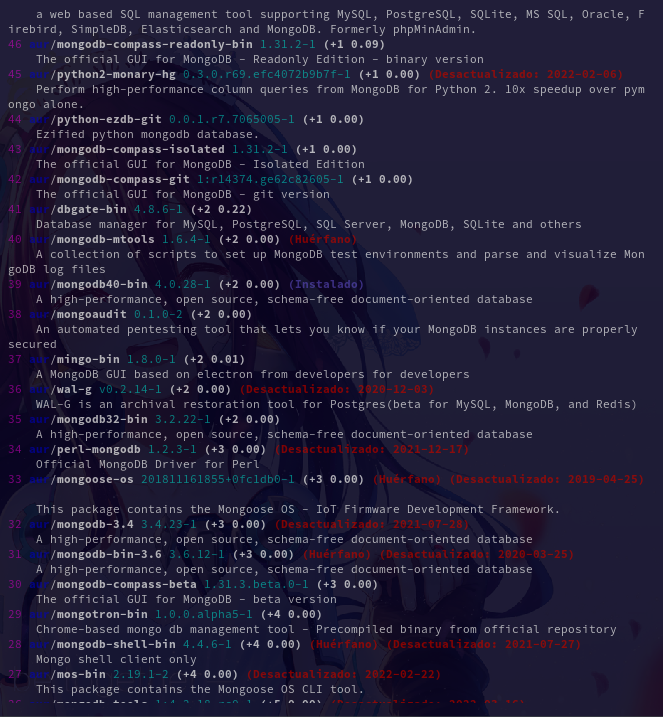

al introducir ese comando, nos apareceran todos los repositorios disponibles para la instalacion. En nuestro caso seleccionamos el repositorio numero 39.
***



***
__Instalacion del pymongo__

Nos dirijimos a la consola de conda y escribimos el siguiente comando :

conda install -c conda-forge pymongo

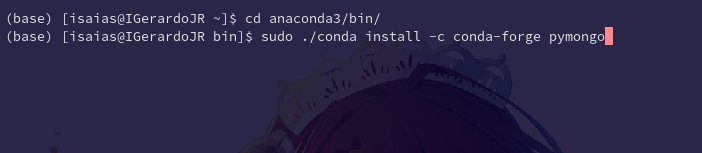

***

 __Verificamos la version de mongo__

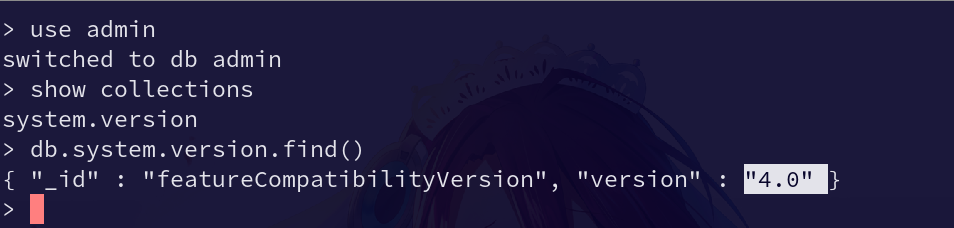

Podremos observar que contamos con la version 4.0 de mongo db.

# Proceso de importacion del CSV a Mongo 

Para ello trabajaremos con las siguientes librerias.

__pymongo__ : Nos servira para importar el cliente mongo y realizar la conexion a la base de datos.

__pandas__ : Nos servira para poder leer el archivo csv mediante el metodo "read_csv" que recibe como parametro la ruta de donde tenemos el csv.

__json__ : Va de la mano con mongodb al insertar diccionarios en las colecciones.



In [145]:
import pymongo      # Nos servira para hacer la conexion a mongo db
import pandas as pd # La usaremos solo para comprobar que el archivo que estamos leyendo sea el correcto
import json         # Nos ayudara a trabajar con colecciones y diccionarios que es como trabaja mongo.

In [146]:
# importamos desde pymongo la libreria MongoClient, 
# la cual nos ayudara a realizar la conexion con mongo
from pymongo import MongoClient
# Ingresamos toda la ruta de donde se encuentra nuestro archivo "titanic.csv"
ruta ="/home/isaias/ArchivosImportantes/LoDeManjaro/Documentos/Jupyter/Datasets-20220222/"
# realizamos la conexion con mongo db, introduciendo la ip y el puerto.
cliente = MongoClient('mongodb://127.0.0.1:27017/')


In [147]:
# indicamos en la variable, la base de datos 
# a la que nos queremos conectar
# db : sera la variable que utilizaremos a lo largo del archivo para identificar la base de datos
db = cliente.get_database('titanic')
# tambien podemos usar
# db = cliente["titanic"]

In [4]:
# Verificamos estar conectados la base de datos llamada 'titanic'
db

Database(MongoClient(host=['127.0.0.1:27017'], document_class=dict, tz_aware=False, connect=True), 'titanic')

In [5]:
# Usamos pandas para leer nuestro archivo csv
df = pd.read_csv(ruta+"titanic.csv")

In [6]:
# Imprimos el archivo para ver si realizo la lectura correctamente
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [15]:
# Convertimos los datos del csv a tipo diccionario para
# que los pueda almacenar nuestra base de datos.
info = df.to_dict(orient = "records")

In [16]:
# Creamos una coleccion  dentro de la base de datos para poder almacenar los datos
db.create_collection("datos")

Collection(Database(MongoClient(host=['127.0.0.1:27017'], document_class=dict, tz_aware=False, connect=True), 'titanic'), 'datos')

In [17]:
# Hacemos un list de nuestras colecciones para verificar que se haya
# creado nuestra coleccion que creamos llamada "datos"
db.list_collection_names() 

#db.collection_names() // de igual forma,podemos usar este metodo, pero esta obsoleto y con riesgo a ser eliminado en un futuro


['datos']

In [18]:
# Le pasamos los datos del titanic csv a nuestra 
# coleccion en base de datos en mongo 
db.datos.insert_many(info)

# Se uso el insert_Many debido a que es mucha informacion
# asi que con ese metodo inserta toda la info de golpe a nuestra coleccion

In [14]:
# Verificamos que la info haya sido insertada en nuestra coleccion
# col : variable a la cual le indicamos el nombre de nuestra coleccion pasandole el parametro db 
#que contiene la base de datos mas aparte el nombre de la coleccion
col = db["datos"]

# Con un ciclo madamos a imprimir todos los datos de nuestra base de datos
for j in col.find({},{"_id":0}): 
    print(j)

{'survived': 0, 'pclass': 3, 'sex': 'male', 'age': 22.0, 'sibsp': 1, 'parch': 0, 'fare': 7.25, 'embarked': 'S', 'class': 'Third', 'who': 'man', 'adult_male': True, 'deck': nan, 'embark_town': 'Southampton', 'alive': 'no', 'alone': False}
{'survived': 1, 'pclass': 1, 'sex': 'female', 'age': 38.0, 'sibsp': 1, 'parch': 0, 'fare': 71.2833, 'embarked': 'C', 'class': 'First', 'who': 'woman', 'adult_male': False, 'deck': 'C', 'embark_town': 'Cherbourg', 'alive': 'yes', 'alone': False}
{'survived': 1, 'pclass': 3, 'sex': 'female', 'age': 26.0, 'sibsp': 0, 'parch': 0, 'fare': 7.925, 'embarked': 'S', 'class': 'Third', 'who': 'woman', 'adult_male': False, 'deck': nan, 'embark_town': 'Southampton', 'alive': 'yes', 'alone': True}
{'survived': 1, 'pclass': 1, 'sex': 'female', 'age': 35.0, 'sibsp': 1, 'parch': 0, 'fare': 53.1, 'embarked': 'S', 'class': 'First', 'who': 'woman', 'adult_male': False, 'deck': 'C', 'embark_town': 'Southampton', 'alive': 'yes', 'alone': False}
{'survived': 0, 'pclass': 3, 

# Find

Ahora que ya hemos almecenado los datos del archivo csv. Podremos realizar consultas dentro del mismo.

Selecciona documentos en una coleccion o vista y retornar un cursor de los documentos seleccionados
***
__Parametros__

 * __query__ : Especifica el filtro de seleccion usando los operadores de consulta. Retorna todos los documentos de una coleccion. Este parametro es opcional, en caso de no especificar el parametro devolvera todo el contenido de nuestra coleccion o vista
 * __projection__ : Especifica los campos para retornar en o los documentos que encuentre el filtro de consulta. Omitir este parametro para retornar todos los campos en los documentos que coincidan.
***

In [12]:
# Ahora que ya tenemos los datos dentro del mongo db, podremos realizar consultas

# Por ejemplo queremos buscar el primer dato que coincida con 
# el genero masculino

# usando el find_one buscara e imprimira la primer coincidencia de acuerdo a los parametros que le indicamos
db.datos.find_one({"sex":"male"},{"_id":0}) 

{'survived': 0,
 'pclass': 3,
 'sex': 'male',
 'age': 35.0,
 'sibsp': 0,
 'parch': 0,
 'fare': 8.05,
 'embarked': 'S',
 'class': 'Third',
 'who': 'man',
 'adult_male': True,
 'deck': nan,
 'embark_town': 'Southampton',
 'alive': 'no',
 'alone': True}

In [19]:
# Ahora un ejemplo devolviendo todos los datos existentes de nuestra coleccion

# Para poder imprimir todos los datos de una coleccion se tendra que hacer
# con algun ciclo


for i in db.datos.find({},{"_id":0}) : 
    print(i)

# No lo habiamos mencionado, pero el atributo "_id":0 hace que no aparezca
# el id a la hora de imprimir, si queremos ver la coleccion con todo y id seria de la siguiente forma.


#for i in db.datos.find() : 
#    print(i)


{'sex': 'female', 'embarked': 'C'}
{'survived': 1, 'pclass': 1, 'sex': 'female', 'age': 38.0, 'sibsp': 1, 'parch': 0, 'fare': 71.2833, 'embarked': 'C', 'class': 'First', 'who': 'woman', 'adult_male': False, 'deck': 'C', 'embark_town': 'Cherbourg', 'alive': 'yes', 'alone': False}
{'survived': 1, 'pclass': 3, 'sex': 'female', 'age': 26.0, 'sibsp': 0, 'parch': 0, 'fare': 7.925, 'embarked': 'S', 'class': 'Third', 'who': 'woman', 'adult_male': False, 'deck': nan, 'embark_town': 'Southampton', 'alive': 'yes', 'alone': True}
{'survived': 1, 'pclass': 1, 'sex': 'female', 'age': 35.0, 'sibsp': 1, 'parch': 0, 'fare': 53.1, 'embarked': 'S', 'class': 'First', 'who': 'woman', 'adult_male': False, 'deck': 'C', 'embark_town': 'Southampton', 'alive': 'yes', 'alone': False}
{'survived': 0, 'pclass': 3, 'sex': 'male', 'age': 35.0, 'sibsp': 0, 'parch': 0, 'fare': 8.05, 'embarked': 'S', 'class': 'Third', 'who': 'man', 'adult_male': True, 'deck': nan, 'embark_town': 'Southampton', 'alive': 'no', 'alone': T

# INSERT 
Podremos agregar uno o varios datos a nuestra coleccion en la base de datos.
***
__parametros__

 * __documento__ : Un documento o arreglo de coumentos para insertar en una coleccion.
 * __writeConcern__ : (Opcional). Un documento expresado con la etiqueta de procurada. Implicitamente pone la escritura procurada, usada principalmente en transacciones.
 * __ordered__ : (Opcional). Si es verdadero, lleva a cabo un orden de insercion de los documentos en el arreglo, si un error ocurre con uno de los documentos, MongoDB lo retornara sin haber procesado el resto de los documentos en el arreglo. Si es falso, lleva a cabo una insercion desordenada, y si un error ocurre con uno de los documentos continua procesando el resto de los documentos en el arreglo. Por defecto viene en verdadero.
***

In [20]:
parametros ="""
survived : 0 | 1
pclass : 1 | 3
sex : "male" | "female"
age : entero, 
sibsp : 0 | 1
parch = entero,
fare = double,
embarked : "S"| "C",
class : "First" | "Third",
who : "man" | "woman",
adult_male : booleano 
embark_towm : string
alive : "Yes" | "No"
"""

In [39]:
# Ejemplo de insercion de datos con las siguientes especificaciones:
db.datos.insert_one({"Survived": 1,
                 "pclass":3, 
                 "sex": "male",
                 "age": 100, "sibsp":0, "fare":7.2500,
                 "embarked": "S","class":"Third","who":"man",
                "adult_male":"false","embark_town":"Torreon",
                "alive":"yes","alone": "true"})

In [32]:
# Consultamos que nuestra insercion se haya efectuado haciendo
# una busqueda
col = db["datos"]
for i in col.find({"Survived": 1,
                 "pclass":3, 
                 "sex": "male",
                 "age": 100, "sibsp":0, "fare":7.2500,
                 "embarked": "S","class":"Third","who":"man",
                "adult_male":"false","embark_town":"Torreon",
                "alive":"yes","alone": "true"}) :
    print(i)

{'_id': ObjectId('626c9027e72a0b29d73623fc'), 'Survived': 1, 'pclass': 3, 'sex': 'male', 'age': 100, 'sibsp': 0, 'fare': 7.25, 'embarked': 'S', 'class': 'Third', 'who': 'man', 'adult_male': 'false', 'embark_town': 'Torreon', 'alive': 'yes', 'alone': 'true'}


# SORT 
Ordenar elementos de acuerdo a una condicion

***
__parametro__
 * __sort__ : Un documento para definir la ordenacion.
***

El parametro sort contiene campos y valores pares, ejemplo :

{ __field__: value }

In [21]:
# Vemos el estado actual de los datos.
# En este ejemplo de ordenacion nos vamos a concentrar en el atributo 
# de las edades, en nuestra variable 'age' vemos como las edades varian
# mucho de linea por linea
col = db["datos"]

for i in col.find({},{"_id":0}) :
    print(i)

{'sex': 'female', 'embarked': 'C'}
{'survived': 1, 'pclass': 1, 'sex': 'female', 'age': 38.0, 'sibsp': 1, 'parch': 0, 'fare': 71.2833, 'embarked': 'C', 'class': 'First', 'who': 'woman', 'adult_male': False, 'deck': 'C', 'embark_town': 'Cherbourg', 'alive': 'yes', 'alone': False}
{'survived': 1, 'pclass': 3, 'sex': 'female', 'age': 26.0, 'sibsp': 0, 'parch': 0, 'fare': 7.925, 'embarked': 'S', 'class': 'Third', 'who': 'woman', 'adult_male': False, 'deck': nan, 'embark_town': 'Southampton', 'alive': 'yes', 'alone': True}
{'survived': 1, 'pclass': 1, 'sex': 'female', 'age': 35.0, 'sibsp': 1, 'parch': 0, 'fare': 53.1, 'embarked': 'S', 'class': 'First', 'who': 'woman', 'adult_male': False, 'deck': 'C', 'embark_town': 'Southampton', 'alive': 'yes', 'alone': False}
{'survived': 0, 'pclass': 3, 'sex': 'male', 'age': 35.0, 'sibsp': 0, 'parch': 0, 'fare': 8.05, 'embarked': 'S', 'class': 'Third', 'who': 'man', 'adult_male': True, 'deck': nan, 'embark_town': 'Southampton', 'alive': 'no', 'alone': T

In [22]:
# Entonces, aplicaremos un ordenamiento por orden descendente a las edades('age')
col = db["datos"]
# Para este ejemplo ordenaremos la edad por orden descendente
sorteo = col.find({},{"_id":0}).sort("age", -1)
for x in sorteo:
    print(x)

# Ahora en la salida veremos que en nuestra variable 'age' las edades
# se muestran desde la edad mas grande hasta la menor, eso quiere
# decir que hemos aplicado el ordenamiento por orden ascendente

{'Survived': 1, 'pclass': 3, 'sex': 'male', 'age': 99, 'sibsp': 0, 'fare': 7.25, 'embarked': 'S', 'class': 'Third', 'who': 'man', 'adult_male': 'false', 'embark_town': 'Lerdo', 'alive': 'yes', 'alone': 'true'}
{'survived': 1, 'pclass': 1, 'sex': 'male', 'age': 80.0, 'sibsp': 0, 'parch': 0, 'fare': 30.0, 'embarked': 'S', 'class': 'First', 'who': 'man', 'adult_male': True, 'deck': 'A', 'embark_town': 'Southampton', 'alive': 'yes', 'alone': True}
{'survived': 0, 'pclass': 3, 'sex': 'male', 'age': 74.0, 'sibsp': 0, 'parch': 0, 'fare': 7.775, 'embarked': 'S', 'class': 'Third', 'who': 'man', 'adult_male': True, 'deck': nan, 'embark_town': 'Southampton', 'alive': 'no', 'alone': True}
{'survived': 0, 'pclass': 1, 'sex': 'male', 'age': 71.0, 'sibsp': 0, 'parch': 0, 'fare': 49.5042, 'embarked': 'C', 'class': 'First', 'who': 'man', 'adult_male': True, 'deck': nan, 'embark_town': 'Cherbourg', 'alive': 'no', 'alone': True}
{'survived': 0, 'pclass': 1, 'sex': 'male', 'age': 71.0, 'sibsp': 0, 'parch'

{'survived': 0, 'pclass': 3, 'sex': 'male', 'age': nan, 'sibsp': 0, 'parch': 0, 'fare': 8.05, 'embarked': 'S', 'class': 'Third', 'who': 'man', 'adult_male': True, 'deck': nan, 'embark_town': 'Southampton', 'alive': 'no', 'alone': True}
{'survived': 0, 'pclass': 3, 'sex': 'male', 'age': nan, 'sibsp': 0, 'parch': 0, 'fare': 8.05, 'embarked': 'S', 'class': 'Third', 'who': 'man', 'adult_male': True, 'deck': nan, 'embark_town': 'Southampton', 'alive': 'no', 'alone': True}
{'survived': 1, 'pclass': 3, 'sex': 'female', 'age': nan, 'sibsp': 0, 'parch': 0, 'fare': 7.7875, 'embarked': 'Q', 'class': 'Third', 'who': 'woman', 'adult_male': False, 'deck': nan, 'embark_town': 'Queenstown', 'alive': 'yes', 'alone': True}
{'survived': 0, 'pclass': 3, 'sex': 'male', 'age': nan, 'sibsp': 0, 'parch': 0, 'fare': 8.05, 'embarked': 'S', 'class': 'Third', 'who': 'man', 'adult_male': True, 'deck': nan, 'embark_town': 'Southampton', 'alive': 'no', 'alone': True}
{'survived': 0, 'pclass': 3, 'sex': 'male', 'age'

# Index 
***
Los indices soportan la eficiente ejecucion de las consultas en MongoDB. Sin los indices, MongoDB debe llevar a cabo un scan de alguna coleccion, scanear cada documento en una coleccion, para seleccionar aquellos documentos que cuadren con las sentencias de consulta. Si existe un indice adecuado, MongoDB puede usar el indice para limitar el numero de documentos que deberia inspeccionar.

Los indices son una estructura especial de datos que almacenan una pequeña porcion de la coleccion de datos en una forma facil de atravesar. El ordenamiento del indice entrada suporta una calidad eficiente de busquedas, basada en un rango de operaciones de consulta. En addicion MongoDB puede retornar resultados usando el ordenamiento en el indice.

Una desventaja de crear un indice es que lo pone un poco por encima de cada insert, update y remove. Esto es debido a que la base de datos no solo necesita hacer la operaciones, ademas tambien necesita hacer una nota de eso en cualquier indice de la colecction. Por lo tanto, el minimo numero absoluto de indices debe ser creado.
***

In [33]:
# Creando un indice
db.datos.create_index([('age',pymongo.ASCENDING),('pclass',pymongo.DESCENDING)]
                     ,name='indice_prueba')


'indice_prueba'

In [41]:
# Comprobamos que nuestro indice haya sido creado correctamente
db.datos.index_information()

{'_id_': {'v': 2, 'key': [('_id', 1)], 'ns': 'titanic.datos'},
 'indice_prueba': {'v': 2,
  'key': [('age', 1), ('pclass', -1)],
  'ns': 'titanic.datos'}}

In [40]:
# Buscamos la info
for i in col.find({'age':100,'pclass':3}) :
    print(i)

{'_id': ObjectId('626c9091e72a0b29d73623fd'), 'Survived': 1, 'pclass': 3, 'sex': 'male', 'age': 100, 'sibsp': 0, 'fare': 7.25, 'embarked': 'S', 'class': 'Third', 'who': 'man', 'adult_male': 'false', 'embark_town': 'Torreon', 'alive': 'yes', 'alone': 'true'}


# Remove
***
__Elimina__ documentos de una coleccion
db.collection.remove() puede tener una de dos sintaxis.
El metodo __remove()__ puede tomar una consulta de documento y un justOne de tipo booleano, este ultimo es opcional.

Es decir, podemos poner una condicion y poner que elimine solo 1 coincidencia/match o todas

En la actualidad este metodo aparece ya como algo obsoleto, asi que otra alternativa a 
remove es __delete__ tanto __delete_one__ para eliminar solo 1 registro o __delete_many__ para borrar todas las coincidencias de acuerdo a un filtro.
***

In [36]:
# Para este ejemplo eliminaremos el ejemplo que introducimos mas arriba
# donde agregamos la edad de 100 y ciudad : torreon

# Primero buscaremos que aun exista lo anterior mencionado
for i in col.find({"age":100,"embark_town":"Torreon"}):
    print(i)

{'_id': ObjectId('626c9027e72a0b29d73623fc'), 'Survived': 1, 'pclass': 3, 'sex': 'male', 'age': 100, 'sibsp': 0, 'fare': 7.25, 'embarked': 'S', 'class': 'Third', 'who': 'man', 'adult_male': 'false', 'embark_town': 'Torreon', 'alive': 'yes', 'alone': 'true'}


In [37]:
# Una vez comprobado que si existe, procederemos a eliminar el elemento.
#col.remove({"age":100,"embark_town":"Torreon"})
db.datos.delete_one({"age":100,"embark_town":"Torreon"})

In [38]:
# Realizaremos otra consulta para verificar que se haya eliminado 
for i in col.find({"age":100,"embark_town":"Torreon"}):
    print(i)

# Si no nos aparece nada en la salida, como aparecio en la salida[56], quiere que la
# fila que contenia ese dato ha sido borrada exitosamente

# UPSERT 
***
 * Crea un nuevo documento si no encuentra ningun documento en la consulta.
 * Actualiza un simple documento mediante una consulta

si upsert y multi son verdaderos y no hay documentos que se emparejen en la consulta, la operacion de actualizacion solo inserta un simple documento.

Para evitar multiples upserts, hay que asegurarnos de que los campos de nuestra consulta esten indexado de forma unica.

Por default cambia a falto, el cual no inserta un nuevo documento cuando no encuentra nada en la consulta.

In [45]:
# Nos conectamos a la db
db = cliente["titanic"]
col = db["datos"]

In [46]:
# Debido a que es una operacion importante verificamos la base
# de datos que estamos manipulando
db

Database(MongoClient(host=['127.0.0.1:27017'], document_class=dict, tz_aware=False, connect=True), 'titanic')

In [47]:
# Buscamos la coleccion que estamos usando.
col

Collection(Database(MongoClient(host=['127.0.0.1:27017'], document_class=dict, tz_aware=False, connect=True), 'titanic'), 'datos')

In [31]:
# En este caso vamos a modificar algo simple
db.datos.update({"fare":7.2500},{"fare":7.2500,"sex":"female","embarked":"C"},True)

# Jupyter nos sugiere usar replace_one, update_one | update_many debido a que update() ya es obsoleto

/tmp/ipykernel_9139/543155798.py:2: DeprecationWarning: update is deprecated. Use replace_one, update_one or update_many instead.
  db.datos.update({"fare":7.2500},{"fare":7.2500,"sex":"female","embarked":"C"},True)


{'n': 1, 'nModified': 1, 'ok': 1.0, 'updatedExisting': True}

In [48]:
# Comprobamos que el upsert nos haya hecho un nuevo documento
#for i in col.find({"fare":7.2500,"sex":"female","embarked":"C"}) :

# Al ejecutar el resultado, debera ser que nos agregue un documento hasta la 
# parte alta de nuestra base de datos
for i in col.find() :
    print(i)

{'_id': ObjectId('626aa3cf55a7f910c656746c'), 'sex': 'female', 'embarked': 'C'}
{'_id': ObjectId('626aa3cf55a7f910c656746d'), 'survived': 1, 'pclass': 1, 'sex': 'female', 'age': 38.0, 'sibsp': 1, 'parch': 0, 'fare': 71.2833, 'embarked': 'C', 'class': 'First', 'who': 'woman', 'adult_male': False, 'deck': 'C', 'embark_town': 'Cherbourg', 'alive': 'yes', 'alone': False}
{'_id': ObjectId('626aa3cf55a7f910c656746e'), 'survived': 1, 'pclass': 3, 'sex': 'female', 'age': 26.0, 'sibsp': 0, 'parch': 0, 'fare': 7.925, 'embarked': 'S', 'class': 'Third', 'who': 'woman', 'adult_male': False, 'deck': nan, 'embark_town': 'Southampton', 'alive': 'yes', 'alone': True}
{'_id': ObjectId('626aa3cf55a7f910c656746f'), 'survived': 1, 'pclass': 1, 'sex': 'female', 'age': 35.0, 'sibsp': 1, 'parch': 0, 'fare': 53.1, 'embarked': 'S', 'class': 'First', 'who': 'woman', 'adult_male': False, 'deck': 'C', 'embark_town': 'Southampton', 'alive': 'yes', 'alone': False}
{'_id': ObjectId('626aa3cf55a7f910c6567470'), 'survi

# UPDATE
Modifica un documento existente o documentos en una colleccion. El metodo puede modificar en especifico campos de un documento(s) que ya existen o reemplazar uno ya existente, dependiendo del parametro.

Por default, __db.collection.update()__ actualiza un simple documento. Incluyendo la opcion multi:true el cual actualiza todos los documentos con los que coincida segun el criterio de la consulta.

Recibe como parametros la o las consultas y el o los nuevos valores, para verlo de una forma mas practica seria.

baseDatos.Coleccion.update(consulta, nuevosValores)

Nota : puede ser tanto update como update_one | update_many
***
__update_one__ : Actualiza la primer coincidencia que encuentre mendiante el filtro.

__update_many__ : Actualiza todos los registros que encuentre mediante el filtro.
***

In [43]:
# Leemos la cabezera del archivo con pandas solo para ver los parametros/atributos
# del archivo.
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [148]:
# Añadimos los diccionarios que eliminamos anteriormente para
# hacer la prueba del update
db.datos.insert_one({"Survived": 1,
                 "pclass":3, 
                 "sex": "male",
                 "age": 100, "sibsp":0, "fare":7.2500,
                 "embarked": "S","class":"Third","who":"man",
                "adult_male":"false","embark_town":"Torreon",
                "alive":"yes","alone": "true"})

In [149]:
# Haremos un ejemplo pequeño, modificaremos el parametro 'age' y 'adult male'
# importante pasarle el parametro $set para que pueda modificar.
db.datos.update_one({"age": 100,"embark_town":"Torreon"},{"$set":{"age":99, "embark_town":"Lerdo"}})

In [150]:
# Hacemos una consulta para ver si se modificaron los datos
for i in db.datos.find({"age":99,"embark_town":"Lerdo"}):
    print(i)

{'_id': ObjectId('626c9091e72a0b29d73623fd'), 'Survived': 1, 'pclass': 3, 'sex': 'male', 'age': 99, 'sibsp': 0, 'fare': 7.25, 'embarked': 'S', 'class': 'Third', 'who': 'man', 'adult_male': 'false', 'embark_town': 'Lerdo', 'alive': 'yes', 'alone': 'true'}
{'_id': ObjectId('626cb431e72a0b29d7362400'), 'Survived': 1, 'pclass': 3, 'sex': 'male', 'age': 99, 'sibsp': 0, 'fare': 7.25, 'embarked': 'S', 'class': 'Third', 'who': 'man', 'adult_male': 'false', 'embark_town': 'Lerdo', 'alive': 'yes', 'alone': 'true'}


In [51]:
# En caso de ser requerido podemos eliminar el parametro recien modificado
#db.datos.delete_many({"age":99,"embark_town":"Lerdo"})

# Vistas

Una vista es el resultado de mostrar una consulta almacenada en los datos, el cual los usuarios de la base de datos pueden consultar como ellos puedan en una collecion de objetos en una base de datos persistente. 

Las vistas no son como las tablas/colecciones ordinarias, mantienen la base de datos en un diccionario.

En algunas bases de datos NoSQL,las vistas son la unica forma de consultar datos. No aplica del todo a mongo db, ya que en mongo podemos consultar los datos con find() o find().pretty().

Entonces la diferencia mas grande entre una vista y una tabla/coleccion ordinaria es que :

 * Las vistas solo son para modo de lectura, muy utiles para por ejemplo en un banco. El banco le muestra cierta informacion al usuario, mas sin embargo este no tiene la posibilidad de modificar los datos, ya que las vistas no cuentan con esa propiedad.
 

In [27]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [55]:
db = cliente["titanic"]
col = db["datos"]

# Creamos la vista con el command 
db.command(
{
    "create": "vista_titanic_mujeres", # Nombre de la vista
    "viewOn": "datos", # La coleccion de donde obtendra la informacion
    "pipeline": [{"$match":{"sex":"female"}}] # Los filtros/condicion
})


{'ok': 1.0}

In [56]:
# Con esto al mandar a llamar a la vista debe de mostrarnos 
# solo aquellas con el sexo femenino
for z in db.vista_titanic_mujeres.find():
    print(z)

{'_id': ObjectId('626aa3cf55a7f910c656746c'), 'sex': 'female', 'embarked': 'C'}
{'_id': ObjectId('626aa3cf55a7f910c656746d'), 'survived': 1, 'pclass': 1, 'sex': 'female', 'age': 38.0, 'sibsp': 1, 'parch': 0, 'fare': 71.2833, 'embarked': 'C', 'class': 'First', 'who': 'woman', 'adult_male': False, 'deck': 'C', 'embark_town': 'Cherbourg', 'alive': 'yes', 'alone': False}
{'_id': ObjectId('626aa3cf55a7f910c656746e'), 'survived': 1, 'pclass': 3, 'sex': 'female', 'age': 26.0, 'sibsp': 0, 'parch': 0, 'fare': 7.925, 'embarked': 'S', 'class': 'Third', 'who': 'woman', 'adult_male': False, 'deck': nan, 'embark_town': 'Southampton', 'alive': 'yes', 'alone': True}
{'_id': ObjectId('626aa3cf55a7f910c656746f'), 'survived': 1, 'pclass': 1, 'sex': 'female', 'age': 35.0, 'sibsp': 1, 'parch': 0, 'fare': 53.1, 'embarked': 'S', 'class': 'First', 'who': 'woman', 'adult_male': False, 'deck': 'C', 'embark_town': 'Southampton', 'alive': 'yes', 'alone': False}
{'_id': ObjectId('626aa3cf55a7f910c6567474'), 'survi

In [58]:
# Y bueno, entonces que hace diferente una lista a una consulta
# Bueno como se menciono en el encabezado de esta seccion una consulta vas directo a la fuente de datos
# mientras que una vista es directamente lo que nosotros le queremos mostrar al usuario.
# Asi que una de las mayores diferencias es que las vistas estan enfocadas a solo lectura de datos, no a la escritura

#Pondremos a prueba nuestra vista y si marca error al querer insertar, quiere decir que nuestra vista realmente
# es una vista.

db.vista_titanic_mujeres.insertOne({"Survived": 1,
                 "pclass":3, 
                 "sex": "female",
                 "age": 98, "sibsp":0, "fare":0.001,
                 "embarked": "S","class":"Third","who":"man",
                "adult_male":"false","embark_town":"Gomez",
                "alive":"yes","alone": "true"})

TypeError: 'Collection' object is not callable. If you meant to call the 'insertOne' method on a 'Collection' object it is failing because no such method exists.

***
__El error que no es error__

Justo paso lo que veiamos venir, nos marca un error al querer hacer un insert sobre la vista. Ya que estamos queriendo hacer un insert sobre una vista, lo cual no es correcto.

Asi que podremos estar seguro que las vistas son confiables para mostrar informacion al usuario e inalterables.
***

# Aggregate

Las operaciones de agregaciones procesan multiples documentos y retornan resultados computarizados. Podemos la agregacion para operaciones como.

***
 * Agrupar valores de multiples documentos juntos.
 * Llevar acabo operaciones en el grup de datos para retornar un resultado.
 * Analizar los cambios de los datos sobre tiempo.
***

Para llevar acabo se pueden usar :
 * Aggregation pipelines : Las cuales esta son el metodo preferido para llevar a cabo agregaciones.
 * Single purpose aggregation methods : Los cuales son simples pero carecen de la agregacion pipeline.
 
***
__Agregation Pipelines__

 * __$match__ 
 
 * __$lookup__
 
 * __$sort__
 
 * __$in__
 
 * __$sum__
 
***

***
SPAM(Single Purpose Aggregation Methods)

__Metodo__

 * db.collection.estimatedDocumentCount() :
Retorna una cuenta aproximada de los documentos en una coleccion o vista.

 * db.collection.count() :
 Retorna el numero de documentos en una coleccion o vista.
 
 * db.collection.distinct() :
 Retorna un arreglo de los documentos que tienen distintos valores 
 que el campo especificado.
***

In [96]:
db = cliente["titanic"]
col = db["datos"]

# Ejemplo 1 usando aggregate 
# Ordena por orden ascendente la edad de las mujeres, siempre y cuando
# su "pclass" sea igual a 3
for i in db.datos.aggregate([
        {"$match": {"pclass":3,"sex":"female","who":"woman"}}, 
        {"$sort" :{"age": 1}} 
]):
    print(i)

{'_id': ObjectId('626aa3cf55a7f910c656747f'), 'survived': 1, 'pclass': 3, 'sex': 'female', 'age': nan, 'sibsp': 0, 'parch': 0, 'fare': 7.225, 'embarked': 'C', 'class': 'Third', 'who': 'woman', 'adult_male': False, 'deck': nan, 'embark_town': 'Cherbourg', 'alive': 'yes', 'alone': True}
{'_id': ObjectId('626aa3cf55a7f910c6567488'), 'survived': 1, 'pclass': 3, 'sex': 'female', 'age': nan, 'sibsp': 0, 'parch': 0, 'fare': 7.8792, 'embarked': 'Q', 'class': 'Third', 'who': 'woman', 'adult_male': False, 'deck': nan, 'embark_town': 'Queenstown', 'alive': 'yes', 'alone': True}
{'_id': ObjectId('626aa3cf55a7f910c656748c'), 'survived': 1, 'pclass': 3, 'sex': 'female', 'age': nan, 'sibsp': 0, 'parch': 0, 'fare': 7.75, 'embarked': 'Q', 'class': 'Third', 'who': 'woman', 'adult_male': False, 'deck': nan, 'embark_town': 'Queenstown', 'alive': 'yes', 'alone': True}
{'_id': ObjectId('626aa3cf55a7f910c656749b'), 'survived': 1, 'pclass': 3, 'sex': 'female', 'age': nan, 'sibsp': 0, 'parch': 0, 'fare': 7.75,

In [126]:
# Ejemplo 2 usando aggregate 
# Mostrara la suma de todas las personas que se salvaron o que estuvieron a salvo 
for x in db.datos.aggregate([
        {"$match":{"alive":"yes"}},
        {"$group":{"_id":"aggregate_ex2","total":{"$sum":"$pclass"}}}
]):
    print(x)

{'_id': 'aggregate_ex2', 'total': 670}


In [143]:
# Cuenta el total de gente que vivia en Southampton
db.datos.count({"embark_town":"Southampton"})

/tmp/ipykernel_124318/3048237087.py:2: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  db.datos.count({"embark_town":"Southampton"})


642

In [144]:
# Indica el valor estimado de los documentos que hay en nuestra coleccion 
# datos de la base de datos titanic
db.datos.estimated_document_count()

892

In [13]:
# Muestra todos los datos de uno o varios documentos, pero sin repetir ninguno.
db.datos.distinct("age")
# La salida la da en forma de arreglo o como bien en python conocemos como listas.

[None,
 nan,
 0.42,
 0.67,
 0.75,
 0.83,
 0.92,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 14.5,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 20.5,
 21.0,
 22.0,
 23.0,
 23.5,
 24.0,
 24.5,
 25.0,
 26.0,
 27.0,
 28.0,
 28.5,
 29.0,
 30.0,
 30.5,
 31.0,
 32.0,
 32.5,
 33.0,
 34.0,
 34.5,
 35.0,
 36.0,
 36.5,
 37.0,
 38.0,
 39.0,
 40.0,
 40.5,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 45.5,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 55.5,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 70.0,
 70.5,
 71.0,
 74.0,
 80.0,
 99]

#  Fin del documento

Muchas gracias por haber llegado hasta este punto :)

__Conclusion del equipo__ 
: 
MongoDB es una base de datos distinta a la que soliamos manejar en la carrera, ya que en este caso MongoDB maneja lo que viene siendo NoSQL.

Con este trabajo hemos aprendido a Manejar una base de datos no relacional. Aprendimos diferencias que tal vez no nos quedaban claras antes de este trabajo, como lo es la diferencia entre una coleccion y un diccionario. Si relacionaramos estos conceptos a un tipo de base de datos relacionales, una coleccion vendria siendo como una tabla y los diccionarios como sus atributos.

Sin duda fue un trabajo en el que nos toco buscar mucha info, pero sentimos que si logramos aprender aunque sea lo basico : Como hacer consultas, eliminar datos, ordenar elementos, hacer indices, crear vistas.
